### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None
sns.set_style('darkgrid')

### Import Dataset

In [3]:
data=pd.read_csv('Iris.csv')
df=data.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
X=df.iloc[:,[1,2]]
X.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


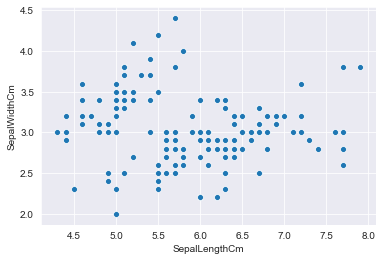

In [30]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=X)

### Creating Dendrogram and find the number of clusters

In [31]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidian Distance')

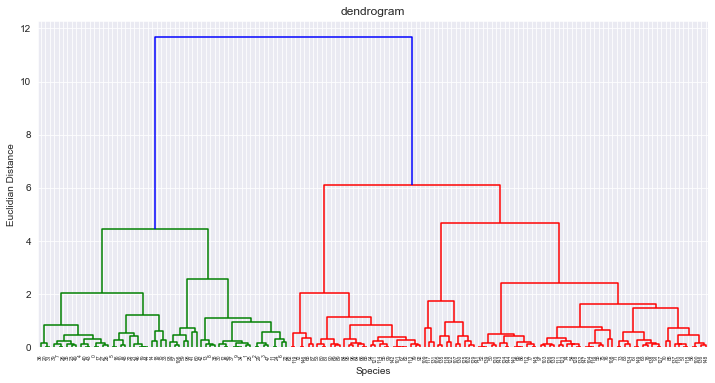

In [32]:
plt.figure(figsize=(12,6))
dendrogram=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidian Distance')

From above dendrogram it's clear that number of clusters is 3

### Model Creation

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
ac=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [35]:
ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [36]:
y_predict=ac.fit_predict(X)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int64)

### Visualization of Clusters

1. iris-setosa
2. iris-versicolor
0. iris-virginica

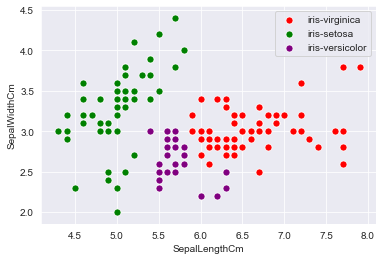

In [37]:
sns.scatterplot(X.iloc[y_predict==0,0], X.iloc[y_predict==0,1], color='red', s=50, label='iris-virginica')
sns.scatterplot(X.iloc[y_predict==1,0], X.iloc[y_predict==1,1], color='green', s=50, label='iris-setosa')
sns.scatterplot(X.iloc[y_predict==2,0], X.iloc[y_predict==2,1], color='purple', s=50, label='iris-versicolor')
plt.legend()